- **Import required libraries:**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Import models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


- **Load the Dataset:**

In [ ]:

file_path = './Fuel_cell_performance_data-Full.csv' 
fuel_cell_data = pd.read_csv(file_path)

features = fuel_cell_data.iloc[:, :-5] 
target = fuel_cell_data['Target4']

print(f"Missing values:\n{fuel_cell_data.isnull().sum()}")

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.3, random_state=42)
print(f"Training size: {X_train.shape}, Testing size: {X_test.shape}")

Missing values:
F1         0
F2         0
F3         0
F4         0
F5         0
F6         0
F7         0
F8         0
F9         0
F10        0
F11        0
F12        0
F13        0
F14        0
F15        0
Target1    0
Target2    0
Target3    0
Target4    0
Target5    0
dtype: int64
Training size: (700, 15), Testing size: (300, 15)


- **Initialize models:**

In [5]:
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Support Vector Regressor": SVR(),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "XGBoost": XGBRegressor(random_state=42),
    "LightGBM": LGBMRegressor(random_state=42),
}


- **Train and Evaluate Models:**

In [ ]:

results = {}
for name, model in models.items():
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    results[name] = {"RMSE": rmse, "R²": r2}


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000229 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3027
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 15
[LightGBM] [Info] Start training from score 5.934586
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, b

- **Results:**

In [8]:
results_df = pd.DataFrame(results).T
print(results_df)

best_model_name = results_df['RMSE'].idxmin()
best_model = models[best_model_name]
print(f"\nBest Model: {best_model_name}")
print(f"Performance: RMSE = {results_df.loc[best_model_name, 'RMSE']}, R² = {results_df.loc[best_model_name, 'R²']}")

                              RMSE        R²
Linear Regression         2.213412 -0.016989
Random Forest             2.253575 -0.054232
Decision Tree             3.332195 -1.304904
Gradient Boosting         2.341571 -0.138169
Support Vector Regressor  2.278743 -0.077910
K-Nearest Neighbors       2.381040 -0.176862
XGBoost                   2.555150 -0.355267
LightGBM                  2.417745 -0.213425

Best Model: Linear Regression
Performance: RMSE = 2.2134119816076017, R² = -0.016989490810566776


- **Best model:**

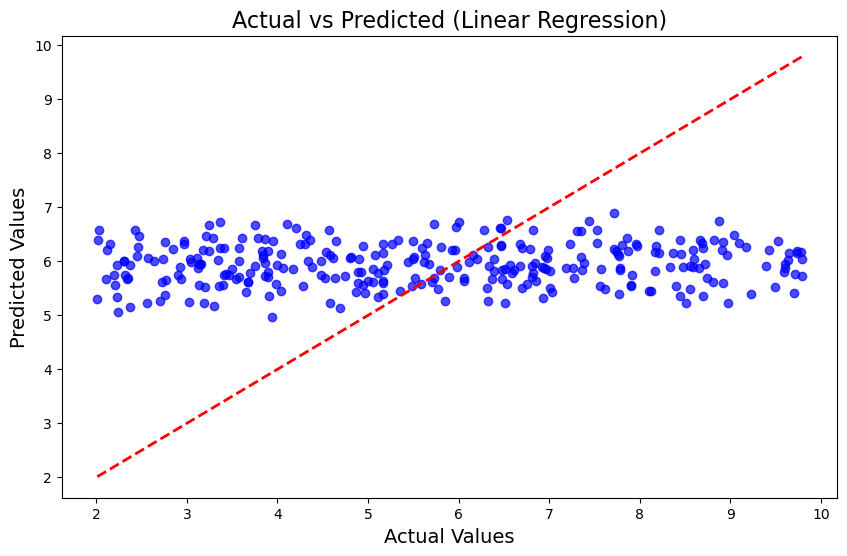

In [7]:
y_pred = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', lw=2)
plt.title(f'Actual vs Predicted ({best_model_name})', fontsize=16)
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.show()


- **Save results:**

In [9]:
results_df.to_csv("model_results.csv", index_label="Model")